In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [75]:
dogs_train = pd.read_csv('dogs_train.csv')
X = dogs_train.drop(['Age segment', 'BreedGroupId'], axis=1)
y = dogs_train['BreedGroupId']
feats = X.columns

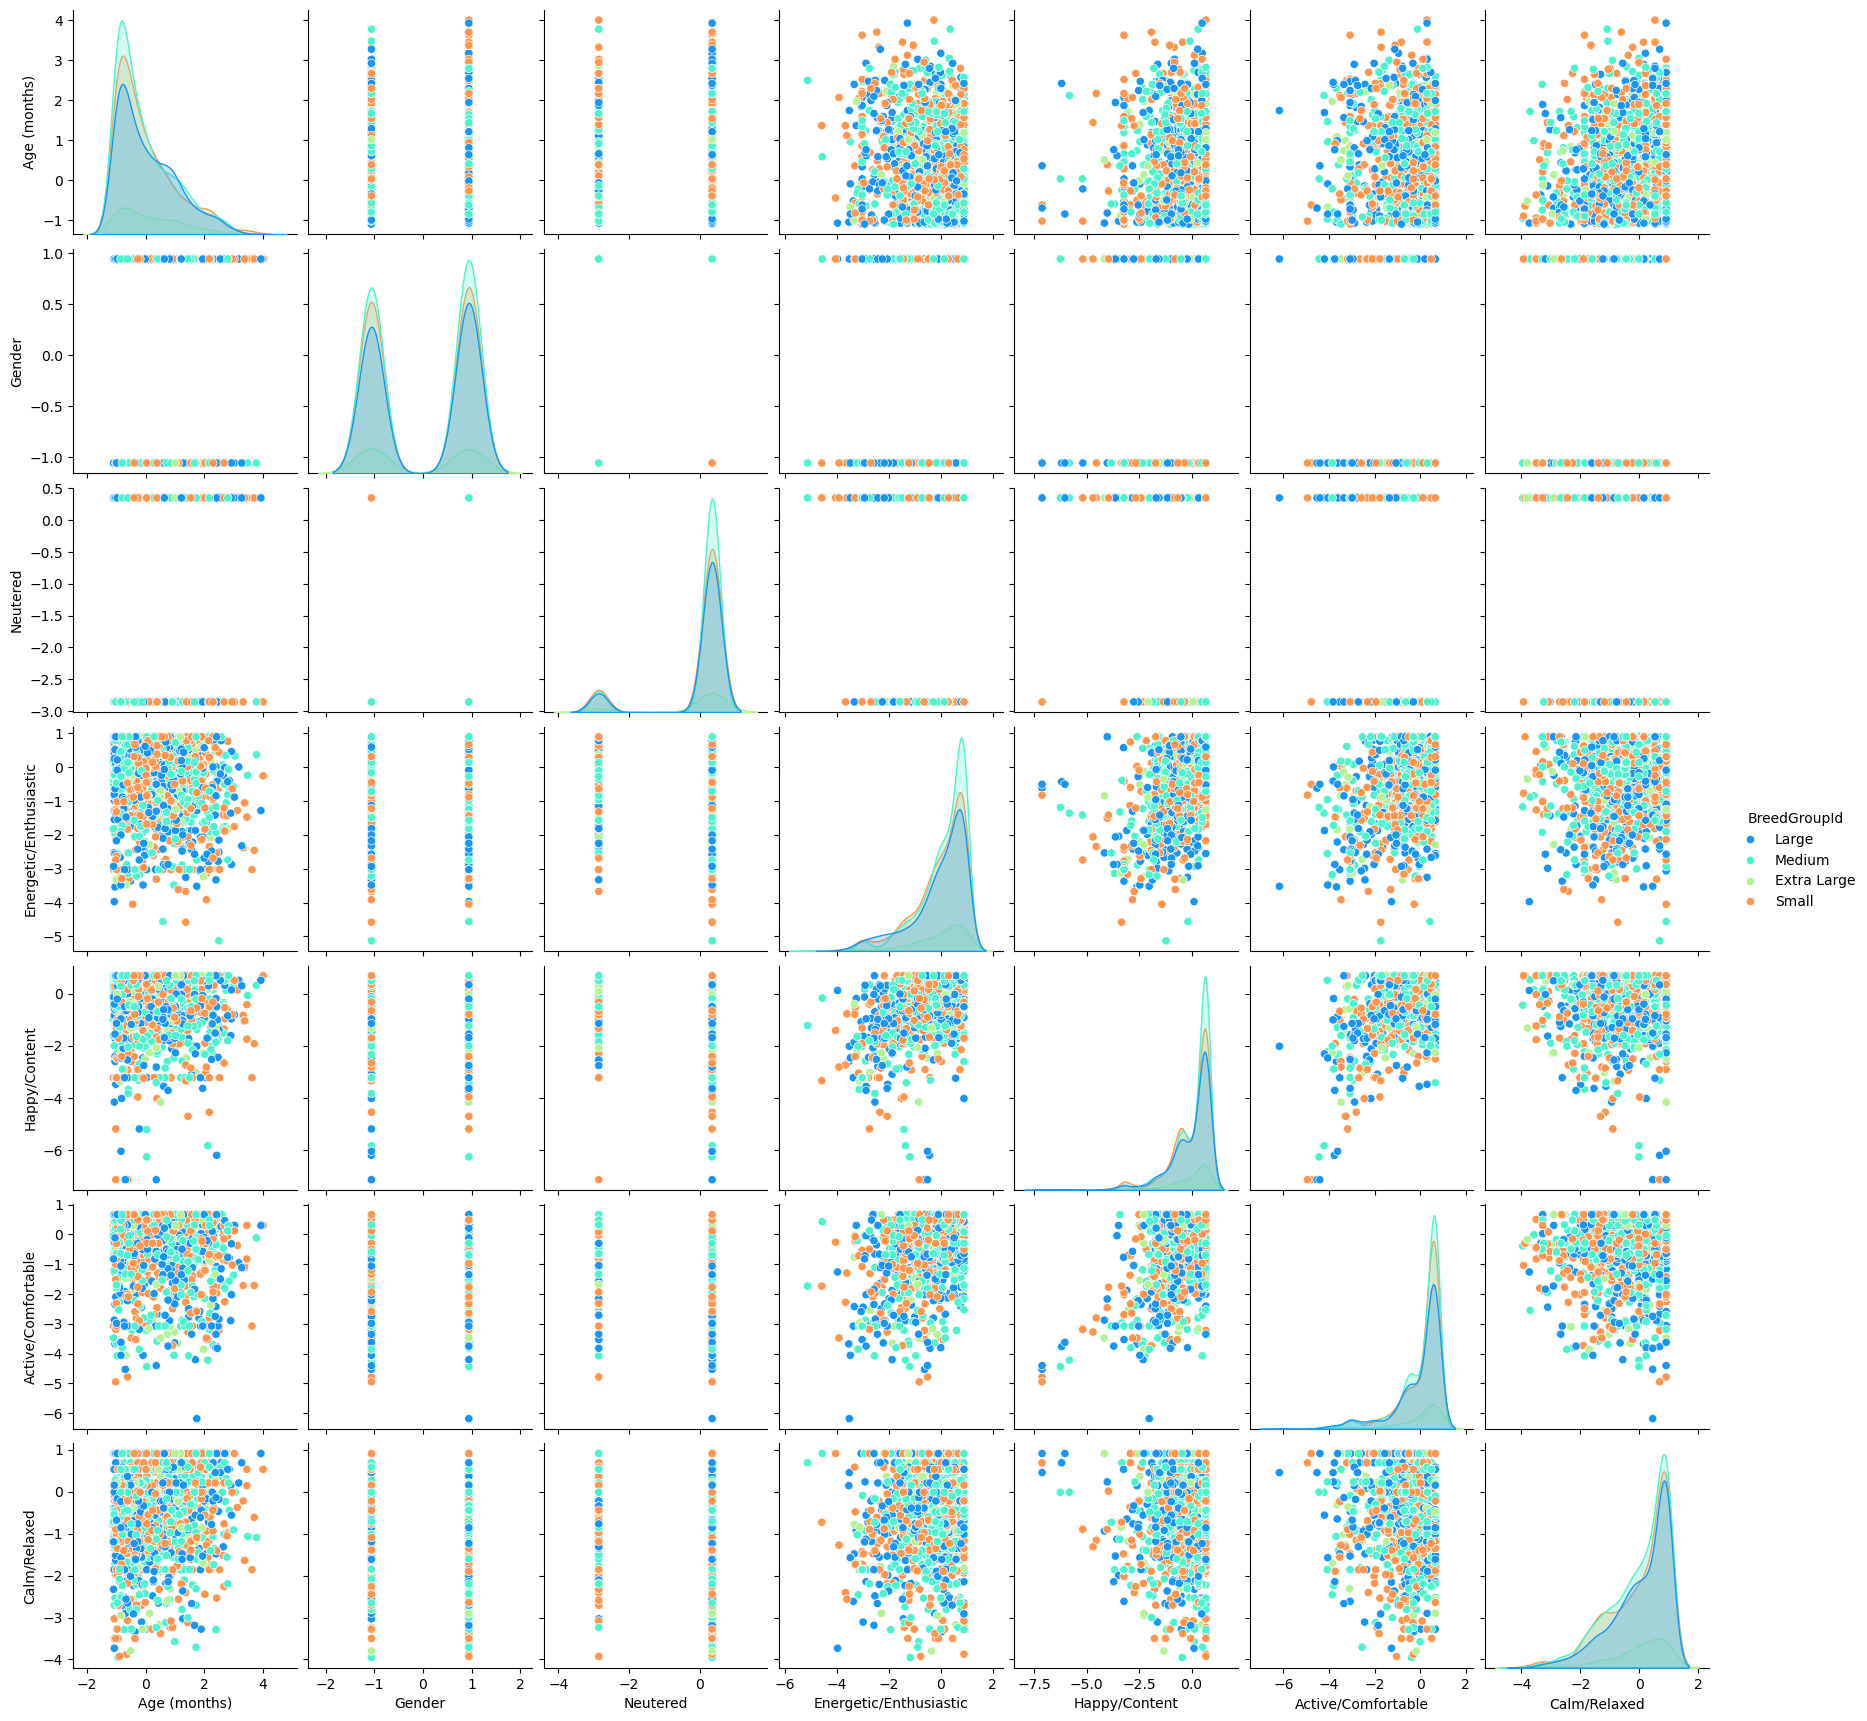

In [77]:
Xn = (X - X.mean(axis = 0)) / X_train.std(axis = 0) # Standardization

df = pd.DataFrame(Xn, columns=feats)
label_dict = {0: 'Small', 1: 'Medium', 2: 'Large', 3: 'Extra Large'}
df['BreedGroupId'] = y.map(label_dict)

sns.pairplot(df, hue = 'BreedGroupId', palette = 'rainbow')
plt.show()

#### PCA:

In [56]:
pca = PCA(n_components = 2)
Xpca = pca.fit_transform(Xn)

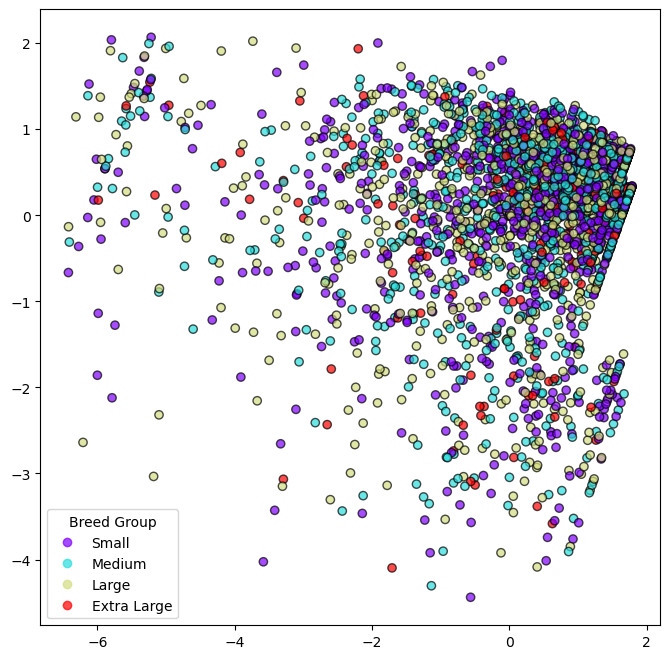

In [89]:
plt.figure(figsize=(8,8))
ax = plt.scatter(Xpca[:,0], Xpca[:,1], c=y, cmap='rainbow', edgecolor='k', alpha=0.7)
plt.legend(ax.legend_elements(prop = 'colors')[0], list(label_dict.values()), title = 'Breed Group')
plt.show()

In [80]:
print(f'Explained Variance Ratio is {pca.explained_variance_ratio_[:2].sum() :.3}')

Explained Variance Ratio is 0.524


#### LDA:

In [84]:
lda = LDA(n_components = 2)   
Xlda = lda.fit_transform(Xn, y)

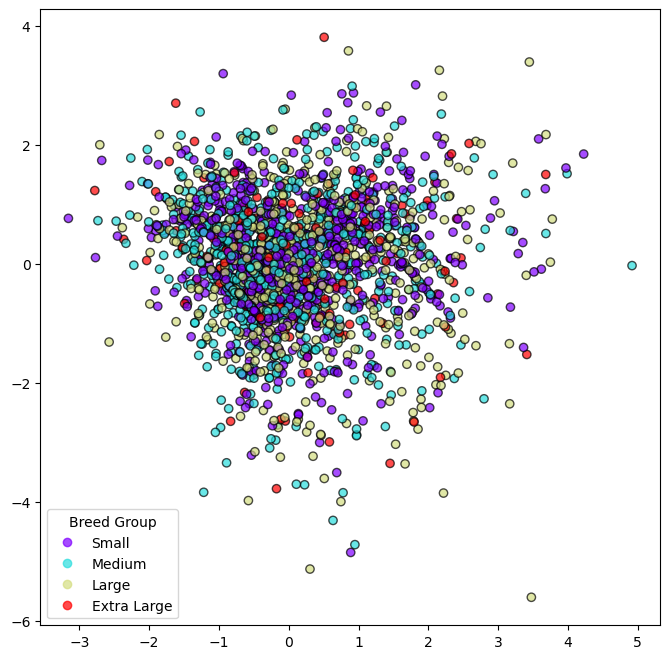

In [88]:
plt.figure(figsize=(8,8))
ax = plt.scatter(Xlda[:,0], Xlda[:,1], c=y, cmap='rainbow', edgecolor='k', alpha=0.7)
plt.legend(ax.legend_elements(prop = 'colors')[0], list(label_dict.values()), title = 'Breed Group')
plt.show()

#### t-SNE

In [86]:
tsne = TSNE(perplexity = 30, random_state = 42)
Xtsne = tsne.fit_transform(Xn)

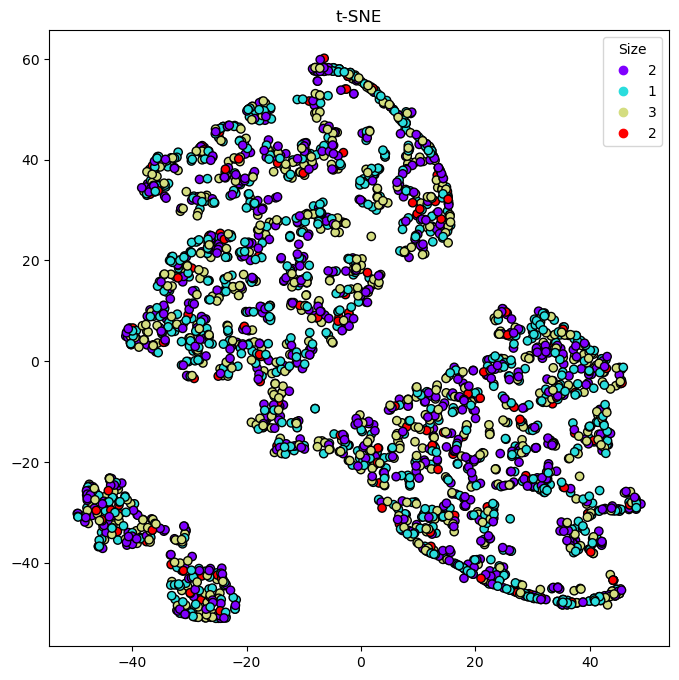

In [87]:
plt.figure(figsize=(8,8))
ax = plt.scatter(Xtsne[:,0], Xtsne[:,1], c=y, cmap='rainbow', edgecolor='k')
plt.legend(ax.legend_elements(prop = 'colors')[0], y, title = 'Size')
plt.title("t-SNE")
plt.show()